In [1]:
# Importar librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import warnings
warnings.filterwarnings('ignore')

Impotamos dataset desde Drive a Colab

In [2]:
from google.colab import drive
drive.mount('/content/drive')



Mounted at /content/drive


In [3]:
# Cargar dataset desde drive
df = pd.read_excel('/content/drive/MyDrive/Diagnosticos casos- tasas-2018-2023 procesado.xlsx', sheet_name=0)

VIsualizar las primeras filas

In [5]:
df.head()

,JURISDICCIÓN,CASOS_VIH,TASAS,SEXO,AÑO,TIPO DE RELACION,EDAD_MEDIANA
0,Buenos Aires,1.578,"9,2",Ambos sexos,2018.0,Otro,NaN
1,Caba,747.000,"24,3",Ambos sexos,2018.0,Otro,NaN
2,Catamarca,5.000,"1,2",Ambos sexos,2018.0,Otro,NaN
3,Chaco,176.000,"14,9",Ambos sexos,2018.0,Otro,NaN
4,Chubut,132.000,"22,1",Ambos sexos,2018.0,Otro,NaN


Estructura de los Datos

In [6]:
df.head()
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 453 entries, 0 to 452
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   JURISDICCIÓN      432 non-null    object 
 1   CASOS_VIH         432 non-null    float64
 2   TASAS             432 non-null    object 
 3   SEXO              432 non-null    object 
 4   AÑO               432 non-null    float64
 5   TIPO DE RELACION  432 non-null    object 
 6   EDAD_MEDIANA      288 non-null    float64
dtypes: float64(3), object(4)
memory usage: 24.9+ KB


,0
JURISDICCIÓN,21
CASOS_VIH,21
TASAS,21
SEXO,21
AÑO,21
TIPO DE RELACION,21
EDAD_MEDIANA,165


Limpieza de los Datos

In [7]:
df.columns = [col.strip() for col in df.columns]
df = df.rename(columns={"TIPO DE RELACION": "TIPO_RELACION"})

In [8]:
# Corregir comas en TASAS
df["TASAS"] = df["TASAS"].astype(str).str.replace(",", ".").astype(float)
df["CASOS_VIH"] = pd.to_numeric(df["CASOS_VIH"], errors="coerce")

In [9]:
# Convertir a numérico
df["CASOS_VIH"] = pd.to_numeric(df["CASOS_VIH"], errors="coerce")
df["EDAD_MEDIANA"] = pd.to_numeric(df["EDAD_MEDIANA"], errors="coerce")
df["AÑO"] = pd.to_numeric(df["AÑO"], errors="coerce")

Eliminar filas

In [10]:
df_clean = df.dropna(subset=["EDAD_MEDIANA", "TASAS", "AÑO", "CASOS_VIH"]).reset_index(drop=True)

In [11]:
# Mostrar cuántas filas quedan
print(f"Filas después del dropna: {len(df_clean)}")

Filas después del dropna: 288


In [12]:
df.describe()

,CASOS_VIH,TASAS,AÑO,EDAD_MEDIANA
count,432.000000,432.000000,432.000000,288.000000
mean,155.112449,15.615509,2020.500000,34.048611
std,223.834620,9.975072,1.709805,2.933241
min,1.000000,0.500000,2018.000000,28.000000
25%,39.000000,8.400000,2019.000000,32.000000
50%,76.500000,13.600000,2020.500000,34.000000
75%,151.250000,20.125000,2022.000000,36.000000
max,1730.000000,63.500000,2023.000000,45.000000


Análisis Exploratorio

In [13]:
print("=== Estadísticas generales ===")
print(df[['AÑO', 'CASOS_VIH', 'EDAD_MEDIANA', 'TASAS']].describe())

=== Estadísticas generales ===
               AÑO    CASOS_VIH  EDAD_MEDIANA       TASAS
count   432.000000   432.000000    288.000000  432.000000
mean   2020.500000   155.112449     34.048611   15.615509
std       1.709805   223.834620      2.933241    9.975072
min    2018.000000     1.000000     28.000000    0.500000
25%    2019.000000    39.000000     32.000000    8.400000
50%    2020.500000    76.500000     34.000000   13.600000
75%    2022.000000   151.250000     36.000000   20.125000
max    2023.000000  1730.000000     45.000000   63.500000


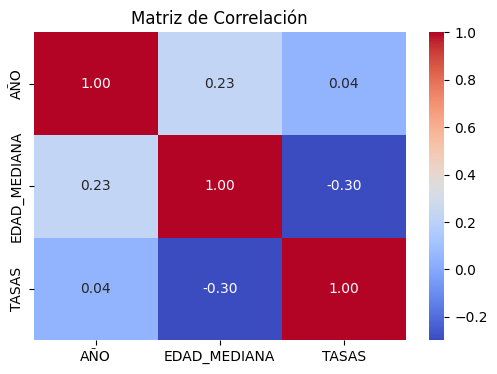

In [14]:
# Matriz de correlación con variables numericas
numeric_df = df[['AÑO', 'EDAD_MEDIANA', 'TASAS']]
plt.figure(figsize=(6, 4))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de Correlación')
plt.show()

Graficos de Dispersión

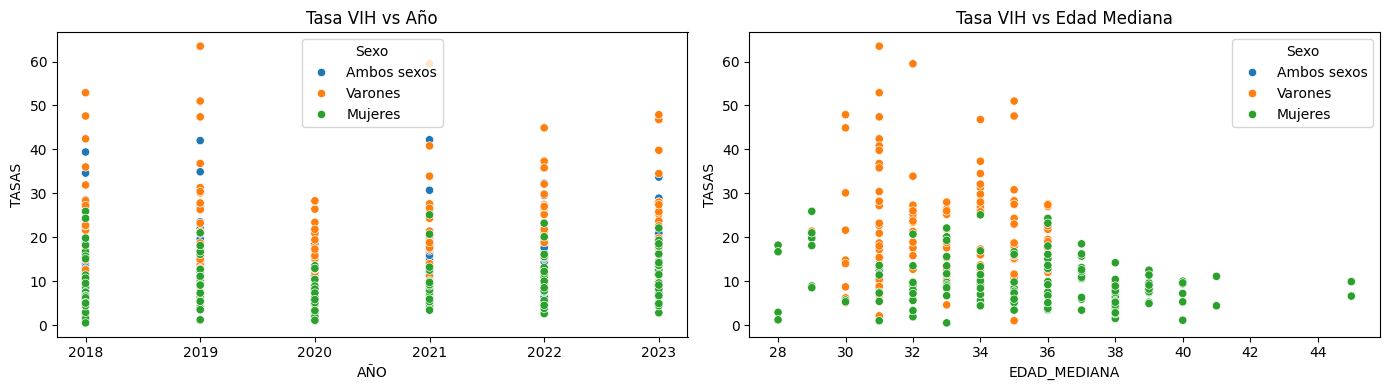

In [15]:
fig, axes = plt.subplots(1,2, figsize=(14, 4))

sns.scatterplot(data=df, x='AÑO', y='TASAS', hue='SEXO', ax=axes[0])
axes[0].set_title('Tasa VIH vs Año')
axes[0].legend(title='Sexo')

sns.scatterplot(data=df, x='EDAD_MEDIANA', y='TASAS', hue='SEXO', ax=axes[1])
axes[1].set_title('Tasa VIH vs Edad Mediana')
axes[1].legend(title='Sexo')
axes[1].xaxis.set_major_locator(plt.MaxNLocator(integer=True))


plt.tight_layout()
plt.show()

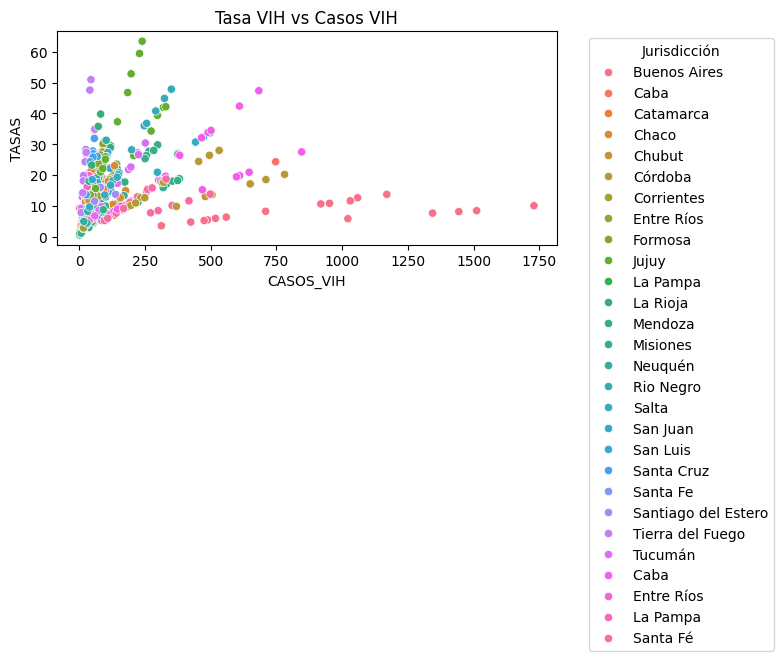

In [16]:
fig, axes = plt.subplots(1, figsize=(8, 5))
sns.scatterplot(data=df, x='CASOS_VIH', y='TASAS', hue='JURISDICCIÓN', ax=axes)
axes.set_title('Tasa VIH vs Casos VIH')
axes.legend(title='Jurisdicción', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()